In [ ]:
#customer churn prediction  

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
data = pd.read_csv(r"C:\Users\PURVA\Downloads\archive (12)\Churn_Modelling.csv")

In [12]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [13]:
data.drop(columns=['RowNumber','CustomerId','Surname'],inplace=True)
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [15]:
data.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [17]:
data.duplicated().sum()

0

In [18]:
data['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [66]:
data['NumOfProducts'].nunique()

4

In [68]:
category_col = [col for col in data.columns if data[col].nunique()<10]
category_col

['NumOfProducts',
 'HasCrCard',
 'IsActiveMember',
 'Exited',
 'Geography_Germany',
 'Geography_Spain',
 'Gender_Male']

In [19]:
data = pd.get_dummies(data, columns=['Geography','Gender'],drop_first=True)

In [20]:
data.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

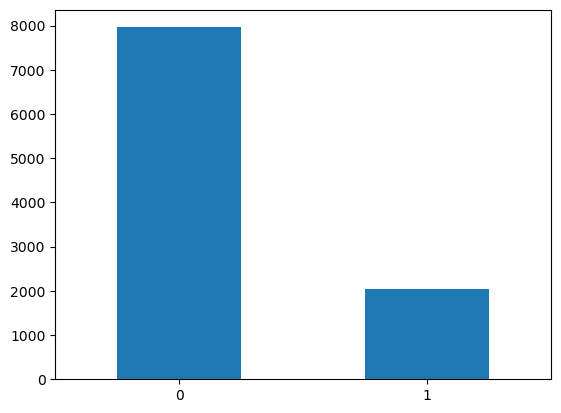

In [23]:
data['Exited'].value_counts().plot(kind='bar')
plt.xticks(rotation=0)

In [24]:
#since the number of people not-exited is more than the number of people exited, we need to balance the dataset for smoother 
#implementation of the ml models

In [25]:
not_exited = data[data['Exited']==0]
exited = data[data['Exited']==1]

In [29]:
print(not_exited.shape[0])
print(exited.shape[0])

7963
2037


In [30]:
not_exited = not_exited.sample(exited.shape[0],random_state=42)
data_new = pd.concat([not_exited,exited])

(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

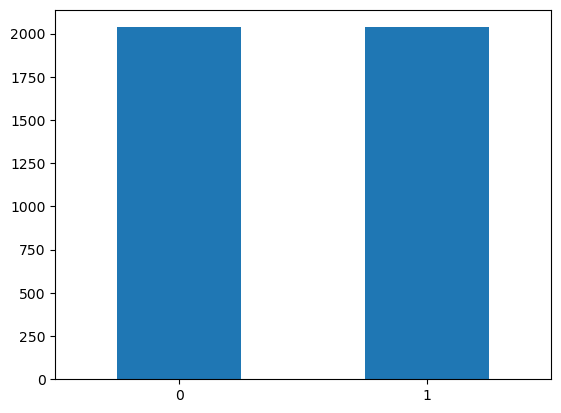

In [33]:
data_new['Exited'].value_counts().plot(kind='bar')
plt.xticks(rotation=0)

In [34]:
corr = data_new.corr()

<Axes: >

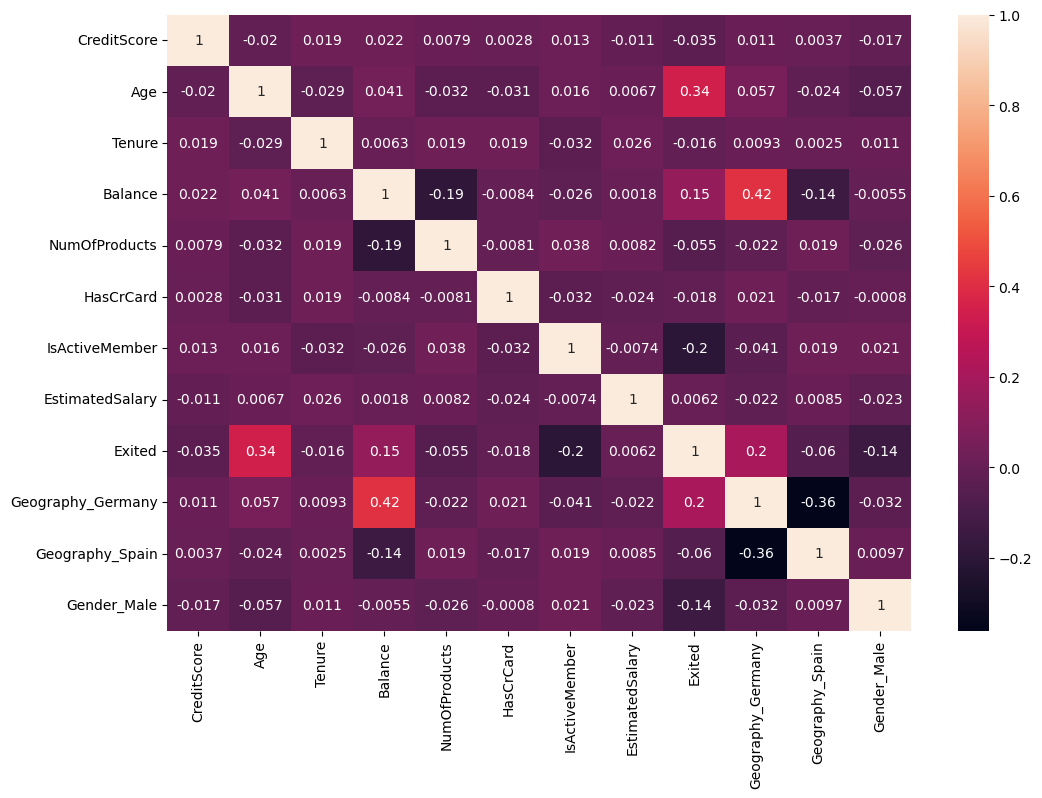

In [35]:
plt.figure(figsize=(12,8))
sns.heatmap(corr,annot=True)

In [36]:
#we can see that there is more correlation in the columns age and exited

In [37]:
#modelling

In [43]:
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import accuracy_score, precision_score,recall_score,f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler

In [42]:
X = data_new.drop(columns='Exited',axis=1)
y = data_new['Exited']

In [44]:
columns = data_new.columns.tolist()
columns.remove('Exited')

In [46]:
scaler = StandardScaler()
X[columns] = scaler.fit_transform(X[columns])
data_new[X.columns] = X
data_new

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
8165,-0.437660,-0.391494,1.045749,1.187445,0.724545,0.643500,-0.925679,-0.208295,0,-0.663389,1.841219,0.977187
6409,0.350901,-0.766775,1.392065,-1.343806,0.724545,0.643500,1.080288,-1.080888,0,-0.663389,-0.543119,-1.023346
2157,0.975605,0.265248,-0.685832,-1.343806,0.724545,0.643500,1.080288,1.524534,0,-0.663389,-0.543119,-1.023346
1618,0.494275,-1.329697,1.045749,0.966753,0.724545,0.643500,-0.925679,-0.182420,0,-0.663389,-0.543119,0.977187
1633,-0.888267,-0.579134,0.699433,-1.343806,-0.760262,-1.554001,-0.925679,-0.905983,0,-0.663389,-0.543119,0.977187
...,...,...,...,...,...,...,...,...,...,...,...,...
9981,-1.543694,0.077608,-0.685832,1.143714,-0.760262,0.643500,1.080288,-0.826631,1,1.507411,-0.543119,0.977187
9982,0.064151,0.452889,0.699433,0.900024,-0.760262,0.643500,-0.925679,0.243434,1,1.507411,-0.543119,-1.023346
9991,-0.529830,1.109631,-0.339516,0.102198,-0.760262,0.643500,-0.925679,-0.550197,1,-0.663389,-0.543119,-1.023346
9997,0.617168,-0.485314,0.699433,-1.343806,-0.760262,-1.554001,1.080288,-1.023637,1,-0.663389,-0.543119,-1.023346


In [49]:
xtrain,xtest,ytrain,ytest = train_test_split(X,y,test_size=0.2,random_state = 42)

In [53]:
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest' : RandomForestClassifier(),
    'Gradient Bossting': GradientBoostingClassifier()
        
}


In [54]:
def evaluate(model,xtrain,ytrain,xtest,ytest):
    model.fit(xtrain,ytrain)
    y_pred = model.predict(xtest)
    accuracy = accuracy_score(ytest,y_pred)
    precision = precision_score(ytest,y_pred)
    recall = recall_score(ytest,y_pred)
    f1 = f1_score(ytest,y_pred)
    return accuracy,precision,recall,f1

In [55]:
results = {}
for name, model in models.items():
    accuracy,precision,recall,f1 = evaluate(model,xtrain,ytrain,xtest,ytest)
    results[name] = {
        'Accuracy': accuracy,
        'Precsion': precision,
        'Recall': recall,
        'f1 score': f1
    }

In [58]:
results_data = pd.DataFrame(results).T
results_data

,Accuracy,Precsion,Recall,f1 score
Logistic Regression,0.720245,0.686528,0.712366,0.699208
Random Forest,0.744785,0.736994,0.685484,0.710306
Gradient Bossting,0.775460,0.761773,0.739247,0.750341


In [59]:
gm = GradientBoostingClassifier()

In [60]:
gm.fit(xtrain,ytrain)

GradientBoostingClassifier()

In [61]:
from sklearn.metrics import confusion_matrix,classification_report
ypred = gm.predict(xtest)
matrix = confusion_matrix(ytest,ypred)
print('Confusion matrix:')
print(matrix)
print('\nclassification report:\n')
print(classification_report(ytest,ypred))

Confusion matrix:
[[357  86]
 [ 97 275]]

classification report:

              precision    recall  f1-score   support

           0       0.79      0.81      0.80       443
           1       0.76      0.74      0.75       372

    accuracy                           0.78       815
   macro avg       0.77      0.77      0.77       815
weighted avg       0.78      0.78      0.78       815



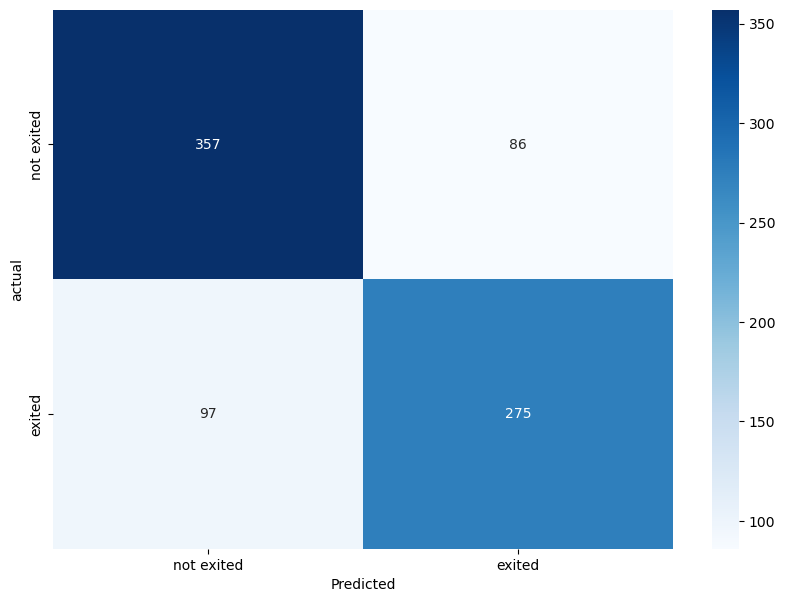

In [65]:
plt.figure(figsize=(10,7))
sns.heatmap(matrix,annot=True,fmt='d',cmap='Blues',xticklabels=['not exited','exited'],yticklabels=['not exited','exited'])
plt.xlabel('Predicted')
plt.ylabel('actual')
plt.show()